Testing output pkl files

In [1]:
import os, sys
import glob
sys.path.append('functionScripts')

import classifyFunctions

def find_files(directory, file_name):
    matches = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == file_name:
                matches.append(os.path.join(root, file))
    return matches

directory = 'C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\Temp\data=count_norm-5HTR\\'
file_name = 'Real_outdata.pkl'

found_files = find_files(directory, file_name)
print('done')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


done


In [2]:
import re

def extract_substring_regex(text, start_marker, end_marker):
    pattern = re.compile(re.escape(start_marker) + "(.*?)" + re.escape(end_marker))
    match = pattern.search(text)
    if match:
        return match.group(1)
    else:
        return None

modelStr: C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\Temp\data=count_norm-5HTR\PowerTrans_RobScal_fSel_SelectKBest(k=30)_clf_LogReg(multinom)_CV100\Real_outdata.pkl


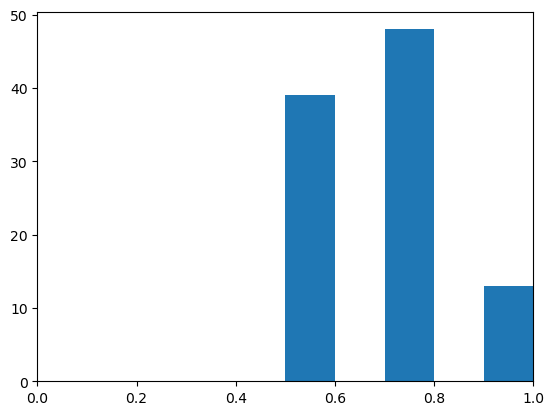

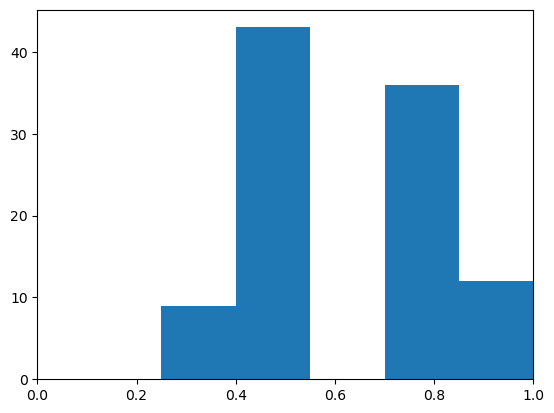

modelStr: C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\Temp\data=count_norm-5HTR\PowerTrans_RobScal_fSel_SelectKBest(k=30)_clf_LogReg(multinom)_CV1000\Real_outdata.pkl


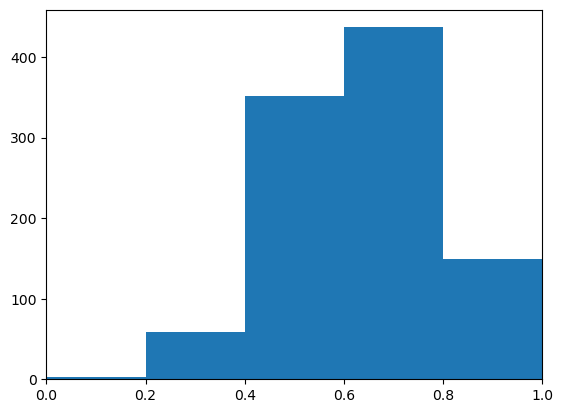

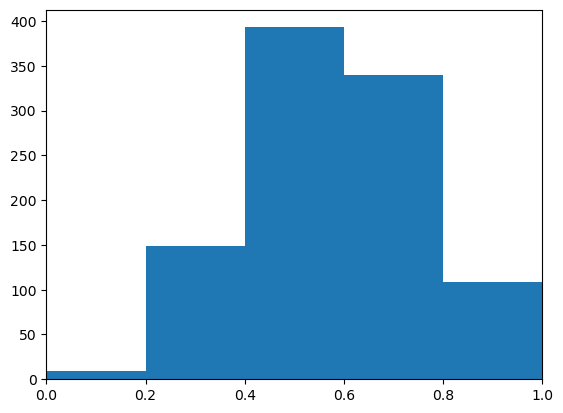

modelStr: C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\Temp\data=count_norm-5HTR\PowerTrans_RobScal_fSel_SelectKBest(k=30)_clf_LogReg(multinom)_CV23\Real_outdata.pkl


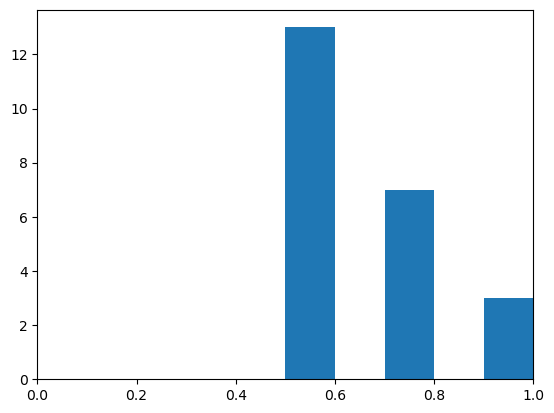

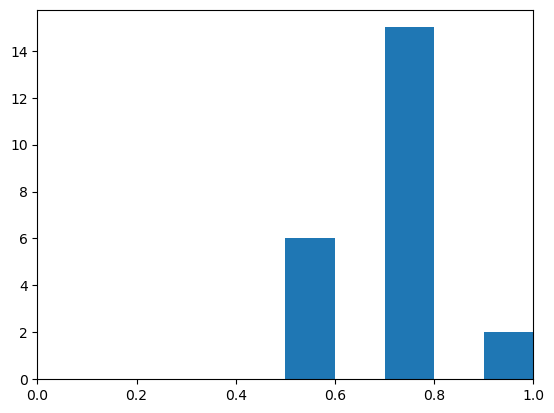

In [4]:
import pickle as pkl
import numpy as np

for saveFilePath in found_files:
    
    with open(saveFilePath, 'rb') as f:                 # Unpickle the data:
        [classifyDict, modelList, modelStr, saveStr, featureSelSwitch, y_real, y_prob, conf_matrix_list_of_arrays, X_test_trans_list, scores, selected_features_list, selected_features_params, baseline_val, shap_values_list] = pkl.load(f)

    print('modelStr:', saveFilePath)
    # print('scores', scores)

    # Plot a histogram of the scores
    import matplotlib.pyplot as plt
    plt.hist(scores, bins=5)
    plt.xlim(0, 1)
    plt.show()

    saveFilePathScramble = saveFilePath.replace('Real', 'Shuffle')

    with open(saveFilePathScramble, 'rb') as f:                 # Unpickle the data:
        [classifyDict, modelList, modelStr, saveStr, featureSelSwitch, y_real, y_prob, conf_matrix_list_of_arrays, X_test_trans_list, scores, selected_features_list, selected_features_params, baseline_val, shap_values_list] = pkl.load(f)

    # print('modelStr:', modelStr)
    # print('scores', scores)

    # Plot a histogram of the scores
    import matplotlib.pyplot as plt
    plt.hist(scores, bins=5)
    plt.xlim(0, 1)
    plt.show()